In [90]:
from six.moves import xrange

import sys, os
sys.path.insert(0, '..')
import time

import numpy as np
from skimage import color
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from lib.dataset.mnist import MNIST
from lib.segmentation.feature_extraction import feature_extraction
from lib.segmentation.algorithm import slic

%matplotlib inline

mnist = MNIST(data_dir='/tmp/mnist')

Extracting /tmp/mnist/train-images-idx3-ubyte.gz
Extracting /tmp/mnist/train-labels-idx1-ubyte.gz
Extracting /tmp/mnist/t10k-images-idx3-ubyte.gz
Extracting /tmp/mnist/t10k-labels-idx1-ubyte.gz


# Feature Extraction
## MNIST SLIC

In [91]:
NUM_SEGMENTS = 10
NUM_EXAMPLES = 100

features = None

t_segmentation = 0
t_features = 0
for i in xrange(NUM_EXAMPLES):
    image, _ = mnist.next_validation_batch(1)
    image = np.reshape(image, (mnist.height, mnist.width))
    image = color.gray2rgb(image)
    
    t_start = time.process_time()
    segmentation = slic(image, NUM_SEGMENTS)
    t_segmentation += time.process_time() - t_start
    
    t_start = time.process_time()
    f = feature_extraction(segmentation, image)
    t_features += time.process_time() - t_start
    
    features = f if features is None else np.concatenate((features, f), axis=0)
    
print('Segmentation duration: {:.5f}s'.format(t_segmentation))
print('Feature extraction duration: {:.5f}s'.format(t_features))
print('')
print('Number of segments collected:', features.shape[0])
print('Number of features collected:', features.shape[1])

/Users/rusty1s/venv/lib/python3.6/site-packages/skimage/measure/_regionprops.py:276: RuntimeWarning: invalid value encountered in double_scalars
  row = m[0, 1] / m[0, 0]
/Users/rusty1s/venv/lib/python3.6/site-packages/skimage/measure/_regionprops.py:277: RuntimeWarning: invalid value encountered in double_scalars
  col = m[1, 0] / m[0, 0]


Segmentation duration: 0.11656s
Feature extraction duration: 1.49776s

Number of segments collected: 660
Number of features collected: 142


[ 30.75452614   3.48476362   2.59946966  63.34179306  41.33003235
   0.14869945   1.56543338   0.15421094  31.42089272   3.32726979]
[  1.96775734   0.33421698   0.25775018   0.81252503  10.16796303
   0.10967569   4.76052666   4.09333515   4.09333515   7.48072004]


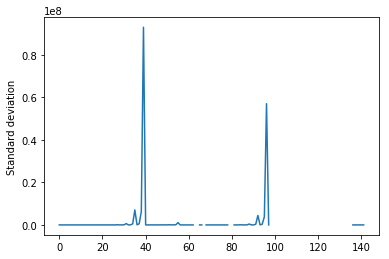

In [92]:
std = np.std(features, axis=0)
plt.plot(std)
print(std[0:10])
print(std[10:20])
plt.ylabel('Standard deviation')
plt.show()

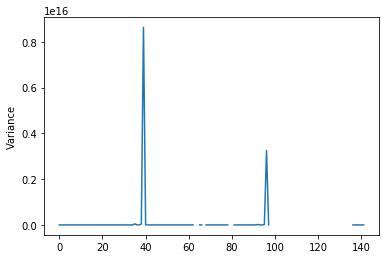

In [93]:
var = np.var(features, axis=0)
plt.plot(var)
plt.ylabel('Variance')
plt.show()

[ 160.  101.  117.  131.   65.  119.   91.  142.  120.  171.   67.   52.
  141.   91.  156.  143.  149.  106.  117.  113.   86.   93.   82.   71.
  111.  107.  136.   98.  129.  116.]
118.788


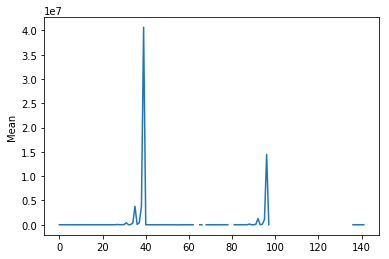

In [94]:
mean = np.mean(features, axis=0)
print(features[0:30, 0])
print(mean[0])
plt.plot(mean)
plt.ylabel('Mean')
plt.show()

/Users/rusty1s/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median for 43 results
  r = func(a, **kwargs)


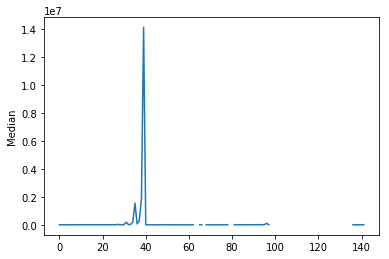

In [95]:
median = np.median(features, axis=0)
plt.plot(median)
plt.ylabel('Median')
plt.show()

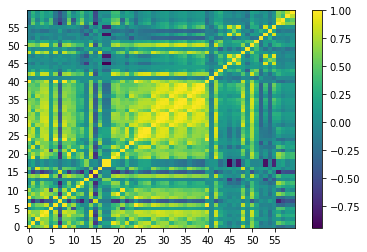

In [96]:
features = features[...,0:60]
NUM_FEATURES = features.shape[1]

pca = PCA()
pca.fit(StandardScaler().fit_transform(features))
cov = pca.get_covariance()
plt.pcolor(cov)
plt.colorbar()
plt.yticks(np.arange(0.5, NUM_FEATURES + 0.5, 5), np.arange(0, NUM_FEATURES, 5))
plt.xticks(np.arange(0.5, NUM_FEATURES + 0.5, 5), np.arange(0, NUM_FEATURES, 5))
plt.show()

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()